In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 64
input_shape = (224,224)

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=0.02,
    width_shift_range=0.01,
    height_shift_range=0.01,
    horizontal_flip=True,
    fill_mode='nearest'

)

val_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_data = train_datagen.flow_from_directory(
    '/kaggle/input/brain-tumor-mri-dataset/Training/',
    target_size = input_shape,
    class_mode = 'categorical',
    batch_size = batch_size,
)

val_data = val_datagen.flow_from_directory(
    '/kaggle/input/brain-tumor-mri-dataset/Testing/',
    target_size = input_shape,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [42]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, MaxPool2D, Conv2D
from keras.optimizers import Adam

In [48]:
from tensorflow.keras.applications import DenseNet121

base_model = DenseNet121(weights = 'imagenet', include_top = False, input_shape = (224,224,3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3)) 
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer=Adam(1e-4), metrics = ['accuracy'])  

In [49]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,800,740 (125.12 MB)

 Trainable params: 25,761,892 (98.27 MB)

 Non-trainable params: 7,038,848 (26.85 MB)

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.001,
    patience = 5,
    mode = 'auto',
    restore_best_weights = True,
    verbose = 1
)

history = model.fit(
    train_data,
    steps_per_epoch = 5712 // batch_size,
    epochs = 20,
    callbacks = early_stopping,
    validation_data = val_data,
    validation_steps = 1311 // batch_size
) 

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.7248 - loss: 0.7348 - val_accuracy: 0.8508 - val_loss: 0.4866
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8594 - loss: 0.4107 - val_accuracy: 0.8523 - val_loss: 0.4865
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 71s 796ms/step - accuracy: 0.8830 - loss: 0.3405 - val_accuracy: 0.9000 - val_loss: 0.2718
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9062 - loss: 0.3074 - val_accuracy: 0.8992 - val_loss: 0.2725
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 71s 800ms/step - accuracy: 0.9258 - loss: 0.2474 - val_accuracy: 0.9227 - val_loss: 0.2089
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9219 - loss: 0.2194 - val_accuracy: 0.9203 - val_loss: 0.2051
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 72s 808ms/step - accuracy: 0.9387 - loss: 0.1961 - val_accuracy: 0.9344 - val_loss: 0.1946
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9531 - loss: 0.1949 - val_accuracy: 0.93

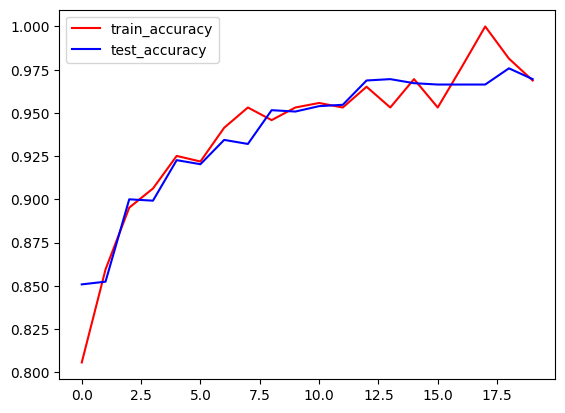

In [51]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'], color = 'red', label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'test_accuracy')

plt.legend()
plt.show()

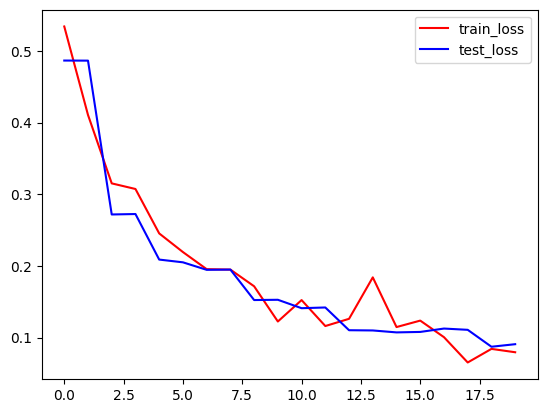

In [52]:
# Loss Graph
plt.plot(history.history['loss'], color = 'red', label = 'train_loss')
plt.plot(history.history['val_loss'], color = 'blue', label = 'test_loss')

plt.legend()
plt.show()

In [53]:
# saving the model
model.save("brain_tumor_Detection.keras")

In [54]:
import os

os.listdir('/kaggle/working')

['brain_tumor_Detection.keras', '.virtual_documents']